In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load the dataset (Change file path accordingly)
df = pd.read_csv("/content/train.csv")


In [5]:
# Display first 5 rows
print(df.head())

# Show dataset info
print(df.info())

# Check missing values
print(df.isnull().sum())

# Describe numerical columns
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [6]:
df = df.copy()  # Avoid chained assignment issues

# Fill missing Age values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with the most common value (mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# Verify if missing values are handled
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


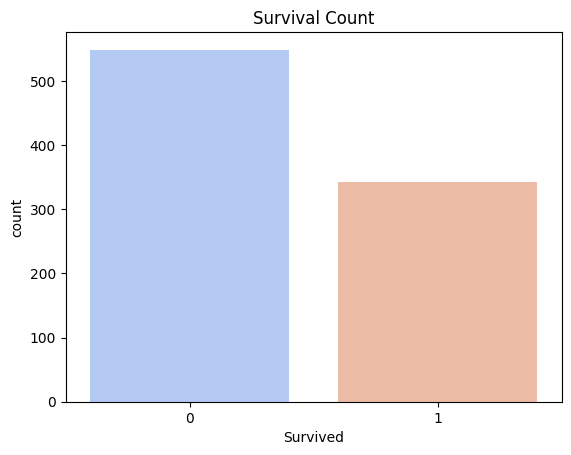

In [7]:
sns.countplot(x='Survived', data=df, hue='Survived', palette='coolwarm', legend=False)
plt.title("Survival Count")
plt.show()


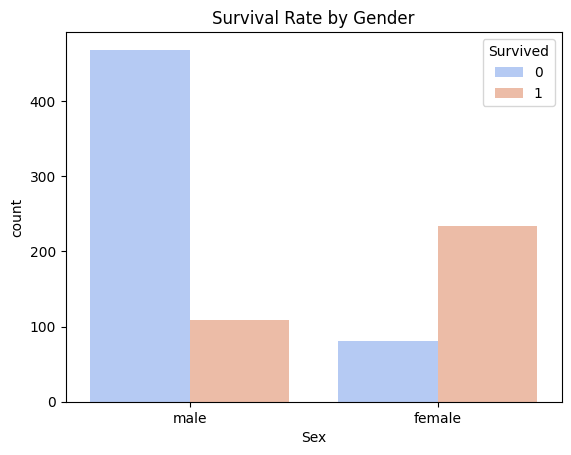

In [8]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='coolwarm')
plt.title("Survival Rate by Gender")
plt.show()


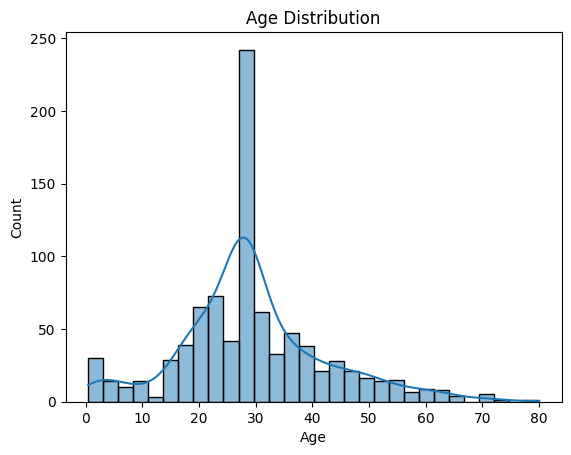

In [9]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


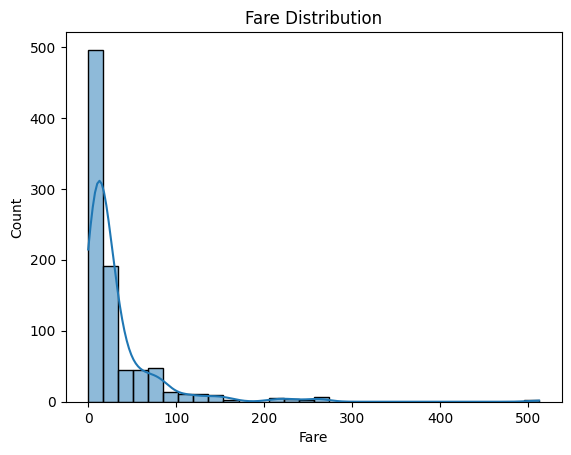

In [10]:
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()


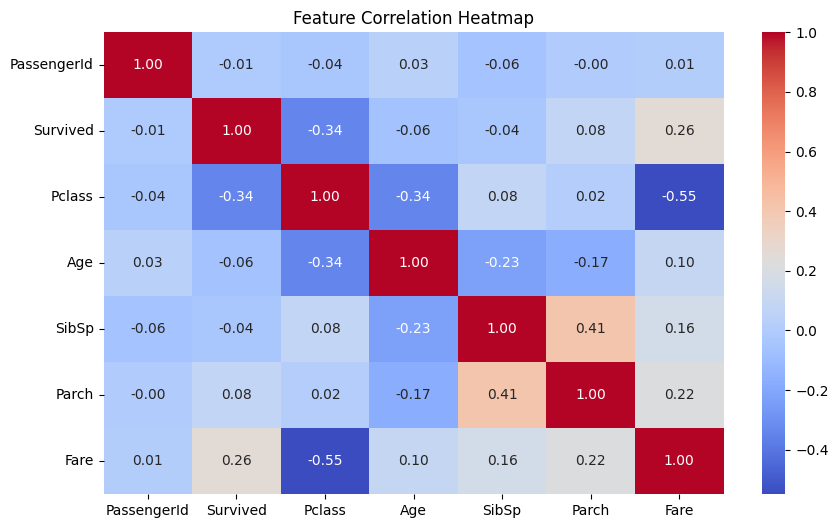

In [12]:
plt.figure(figsize=(10, 6))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Generate heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()


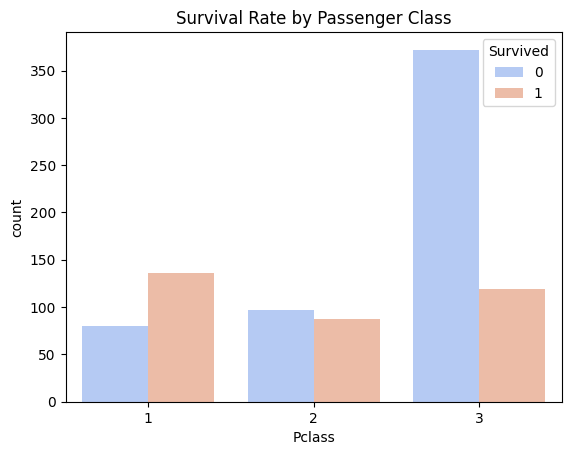

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='coolwarm')
plt.title("Survival Rate by Passenger Class")
plt.show()


In [14]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert gender to numeric
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # One-hot encoding for 'Embarked'


In [15]:
df.to_csv("cleaned_titanic.csv", index=False)
